In [1]:

# Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

print(f"Dataset loaded: {df.shape}")

Dataset loaded: (7043, 21)


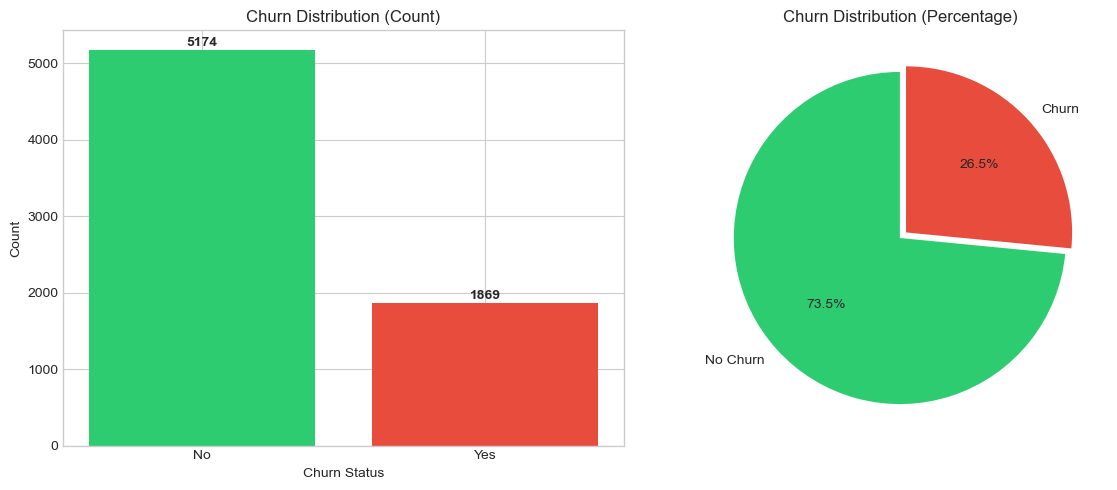

In [2]:
# Churn Distribution Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Count')
axes[0].set_title('Churn Distribution (Count)')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

axes[1].pie(churn_counts.values, labels=['No Churn', 'Churn'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
            explode=[0, 0.05], startangle=90)
axes[1].set_title('Churn Distribution (Percentage)')

plt.tight_layout()
plt.show()




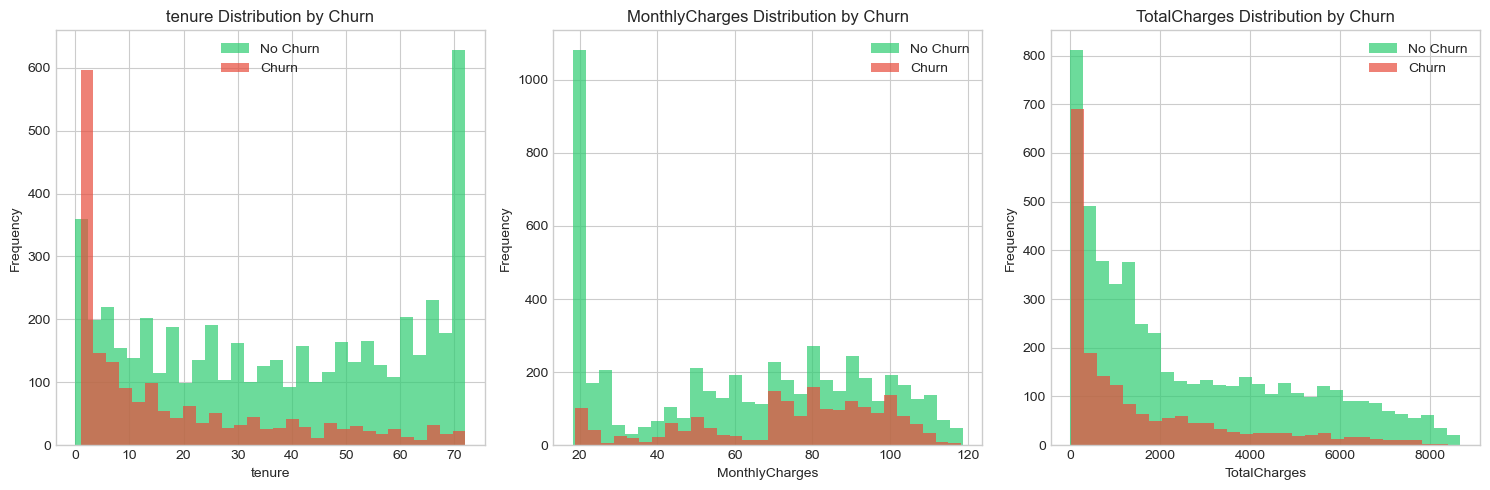

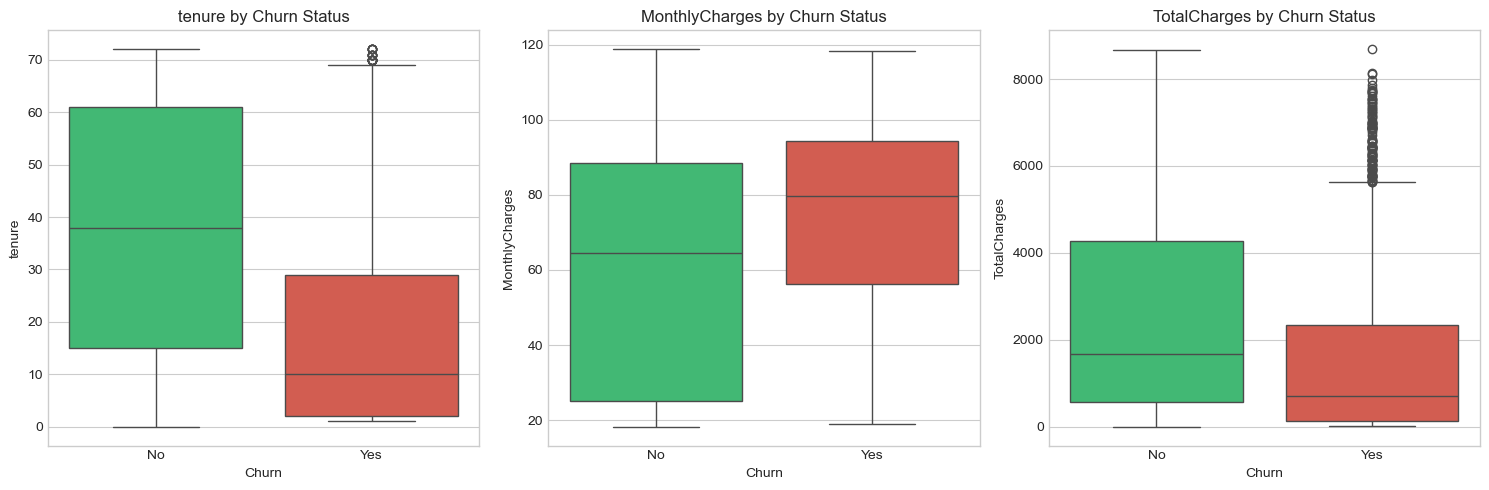

In [3]:
# Numerical Features Distribution
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[df['Churn'] == 'No'][col], bins=30, alpha=0.7, label='No Churn', color='#2ecc71')
    axes[i].hist(df[df['Churn'] == 'Yes'][col], bins=30, alpha=0.7, label='Churn', color='#e74c3c')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Box Plots for Numerical Features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
    axes[i].set_title(f'{col} by Churn Status')

plt.tight_layout()
plt.show()


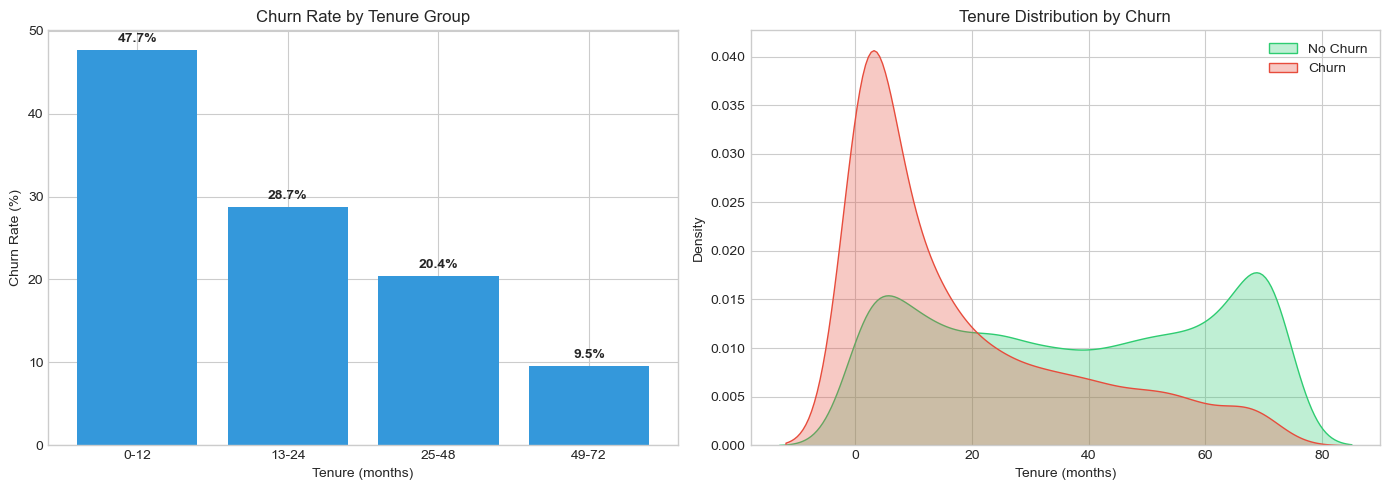

In [4]:
# Tenure Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                            labels=['0-12', '13-24', '25-48', '49-72'])

tenure_churn = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[0].bar(tenure_churn.index, tenure_churn.values, color='#3498db')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Tenure Group')
for i, v in enumerate(tenure_churn.values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

sns.kdeplot(data=df[df['Churn'] == 'No'], x='tenure', ax=axes[1], label='No Churn', color='#2ecc71', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='tenure', ax=axes[1], label='Churn', color='#e74c3c', fill=True, alpha=0.3)
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Density')
axes[1].set_title('Tenure Distribution by Churn')
axes[1].legend()

plt.tight_layout()
plt.show()

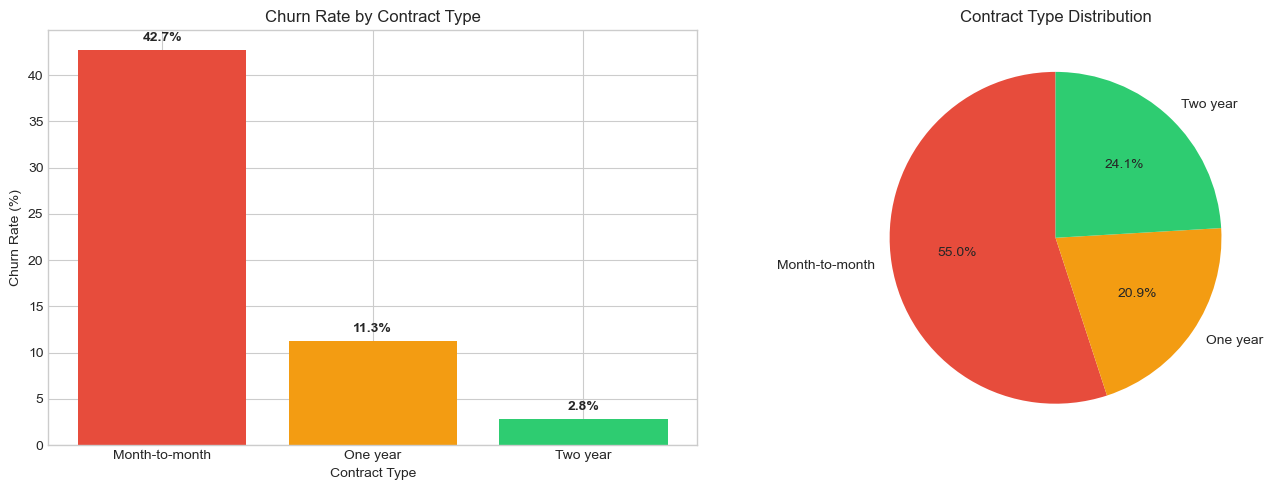

In [5]:
# Cell 7: Contract Type Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
contract_order = ['Month-to-month', 'One year', 'Two year']
contract_churn = contract_churn.reindex(contract_order)

colors = ['#e74c3c', '#f39c12', '#2ecc71']
axes[0].bar(contract_churn.index, contract_churn.values, color=colors)
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Contract Type')
for i, v in enumerate(contract_churn.values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

contract_counts = df['Contract'].value_counts().reindex(contract_order)
axes[1].pie(contract_counts.values, labels=contract_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Contract Type Distribution')

plt.tight_layout()
plt.show()

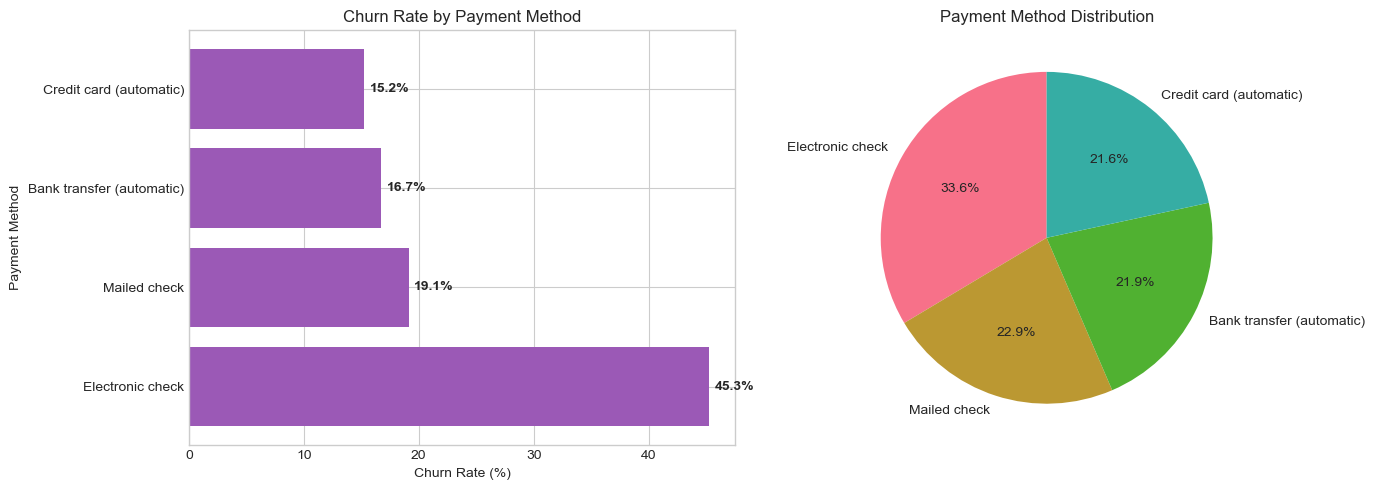

In [6]:
#Payment Method Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)

axes[0].barh(payment_churn.index, payment_churn.values, color='#9b59b6')
axes[0].set_xlabel('Churn Rate (%)')
axes[0].set_ylabel('Payment Method')
axes[0].set_title('Churn Rate by Payment Method')
for i, v in enumerate(payment_churn.values):
    axes[0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

payment_counts = df['PaymentMethod'].value_counts()
axes[1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Payment Method Distribution')

plt.tight_layout()
plt.show()

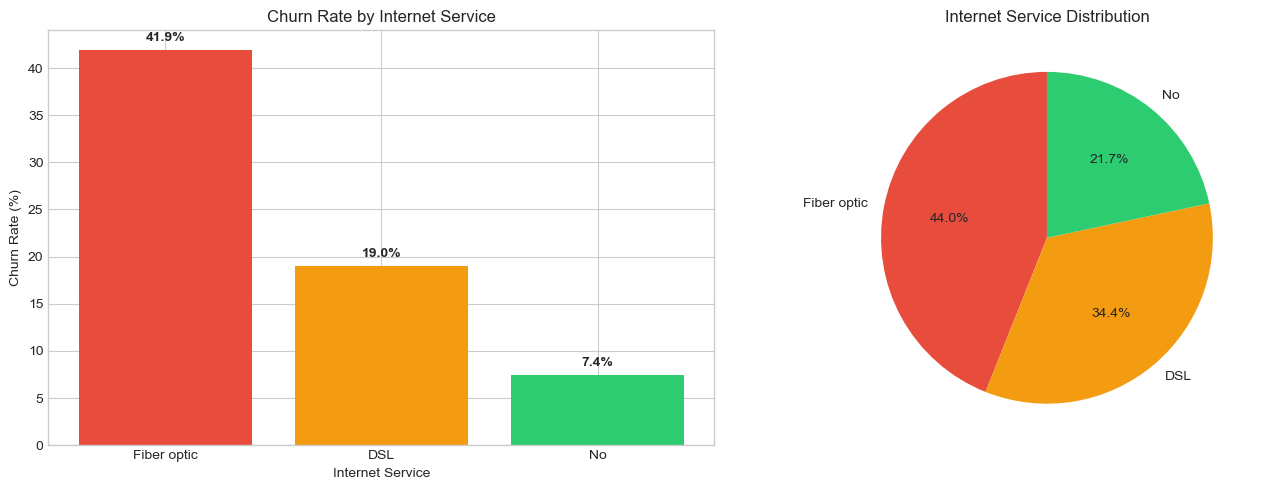

In [7]:
# Internet Service Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
internet_order = ['Fiber optic', 'DSL', 'No']
internet_churn = internet_churn.reindex(internet_order)

colors = ['#e74c3c', '#f39c12', '#2ecc71']
axes[0].bar(internet_churn.index, internet_churn.values, color=colors)
axes[0].set_xlabel('Internet Service')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Internet Service')
for i, v in enumerate(internet_churn.values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

internet_counts = df['InternetService'].value_counts().reindex(internet_order)
axes[1].pie(internet_counts.values, labels=internet_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Internet Service Distribution')

plt.tight_layout()
plt.show()

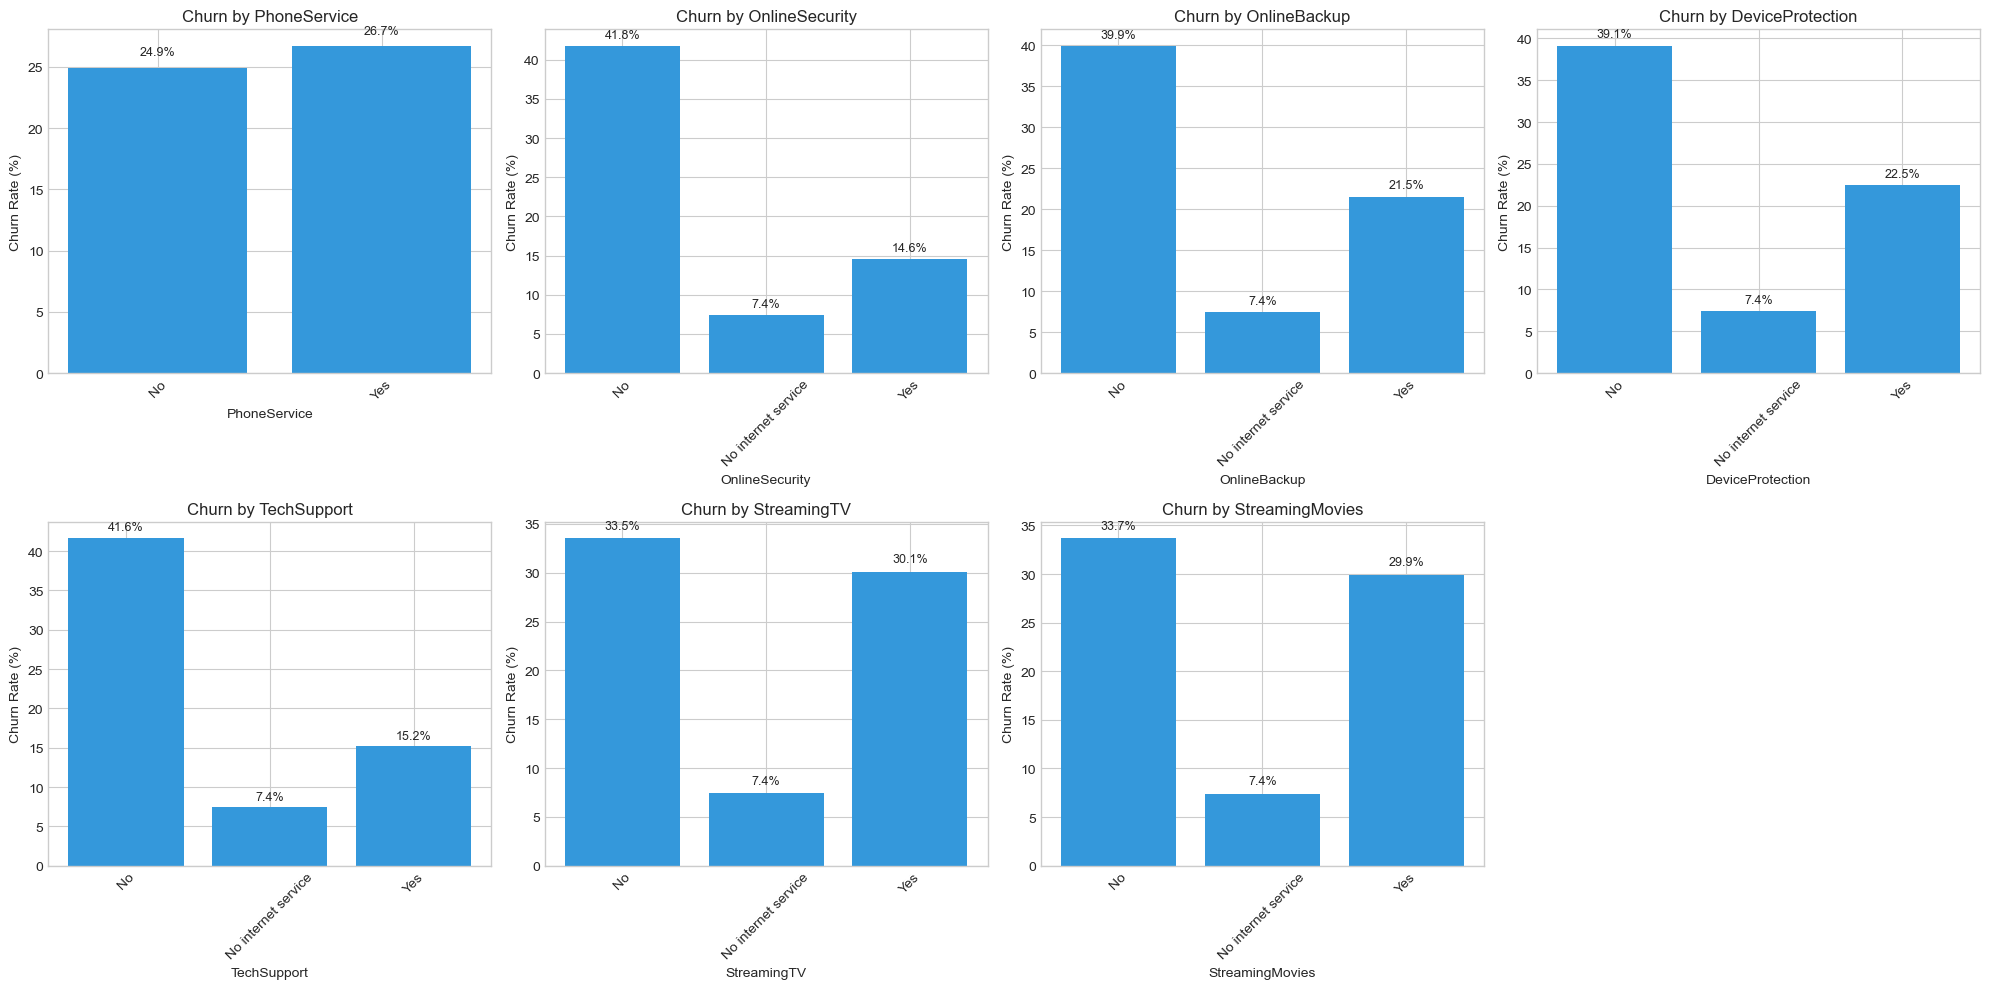

In [8]:
#Services Analysis
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, service in enumerate(services):
    service_churn = df.groupby(service)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    axes[i].bar(service_churn.index, service_churn.values, color='#3498db')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].set_title(f'Churn by {service}')
    axes[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(service_churn.values):
        axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

axes[7].axis('off')

plt.tight_layout()
plt.show()


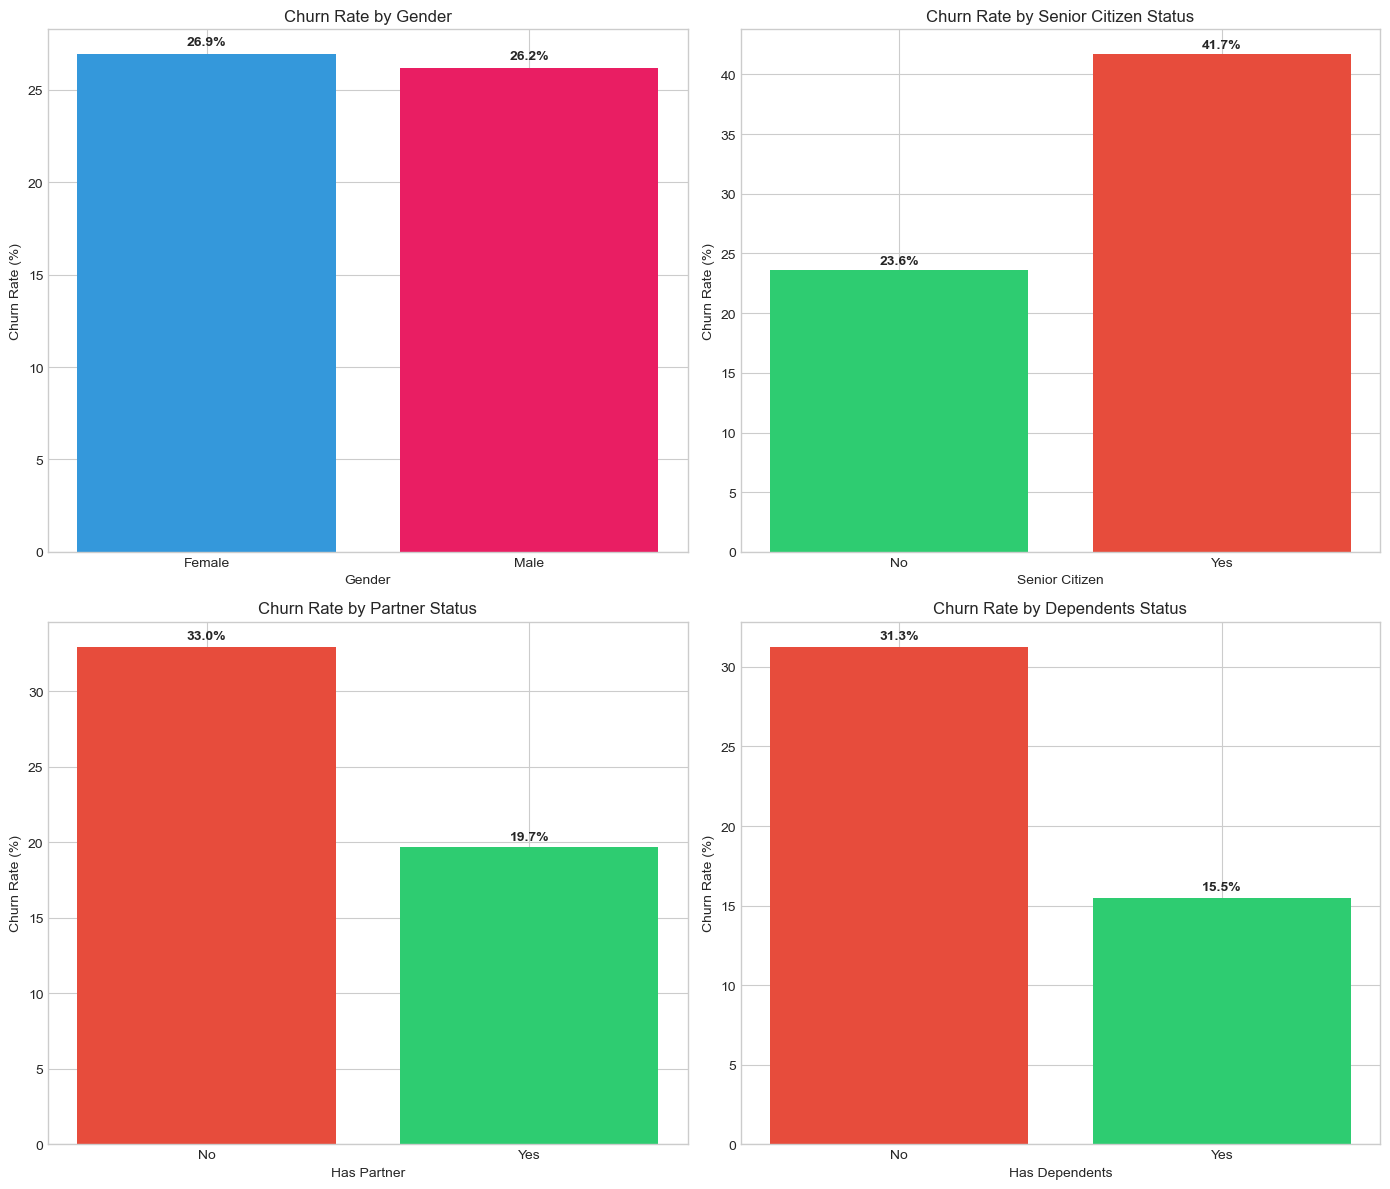

In [9]:
# Demographics Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

gender_churn = df.groupby('gender')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[0, 0].bar(gender_churn.index, gender_churn.values, color=['#3498db', '#e91e63'])
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Churn Rate (%)')
axes[0, 0].set_title('Churn Rate by Gender')
for i, v in enumerate(gender_churn.values):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
senior_labels = ['No', 'Yes']
axes[0, 1].bar(senior_labels, senior_churn.values, color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_xlabel('Senior Citizen')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].set_title('Churn Rate by Senior Citizen Status')
for i, v in enumerate(senior_churn.values):
    axes[0, 1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

partner_churn = df.groupby('Partner')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[1, 0].bar(partner_churn.index, partner_churn.values, color=['#e74c3c', '#2ecc71'])
axes[1, 0].set_xlabel('Has Partner')
axes[1, 0].set_ylabel('Churn Rate (%)')
axes[1, 0].set_title('Churn Rate by Partner Status')
for i, v in enumerate(partner_churn.values):
    axes[1, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

dependents_churn = df.groupby('Dependents')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[1, 1].bar(dependents_churn.index, dependents_churn.values, color=['#e74c3c', '#2ecc71'])
axes[1, 1].set_xlabel('Has Dependents')
axes[1, 1].set_ylabel('Churn Rate (%)')
axes[1, 1].set_title('Churn Rate by Dependents Status')
for i, v in enumerate(dependents_churn.values):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Top correlations with Churn:
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes   

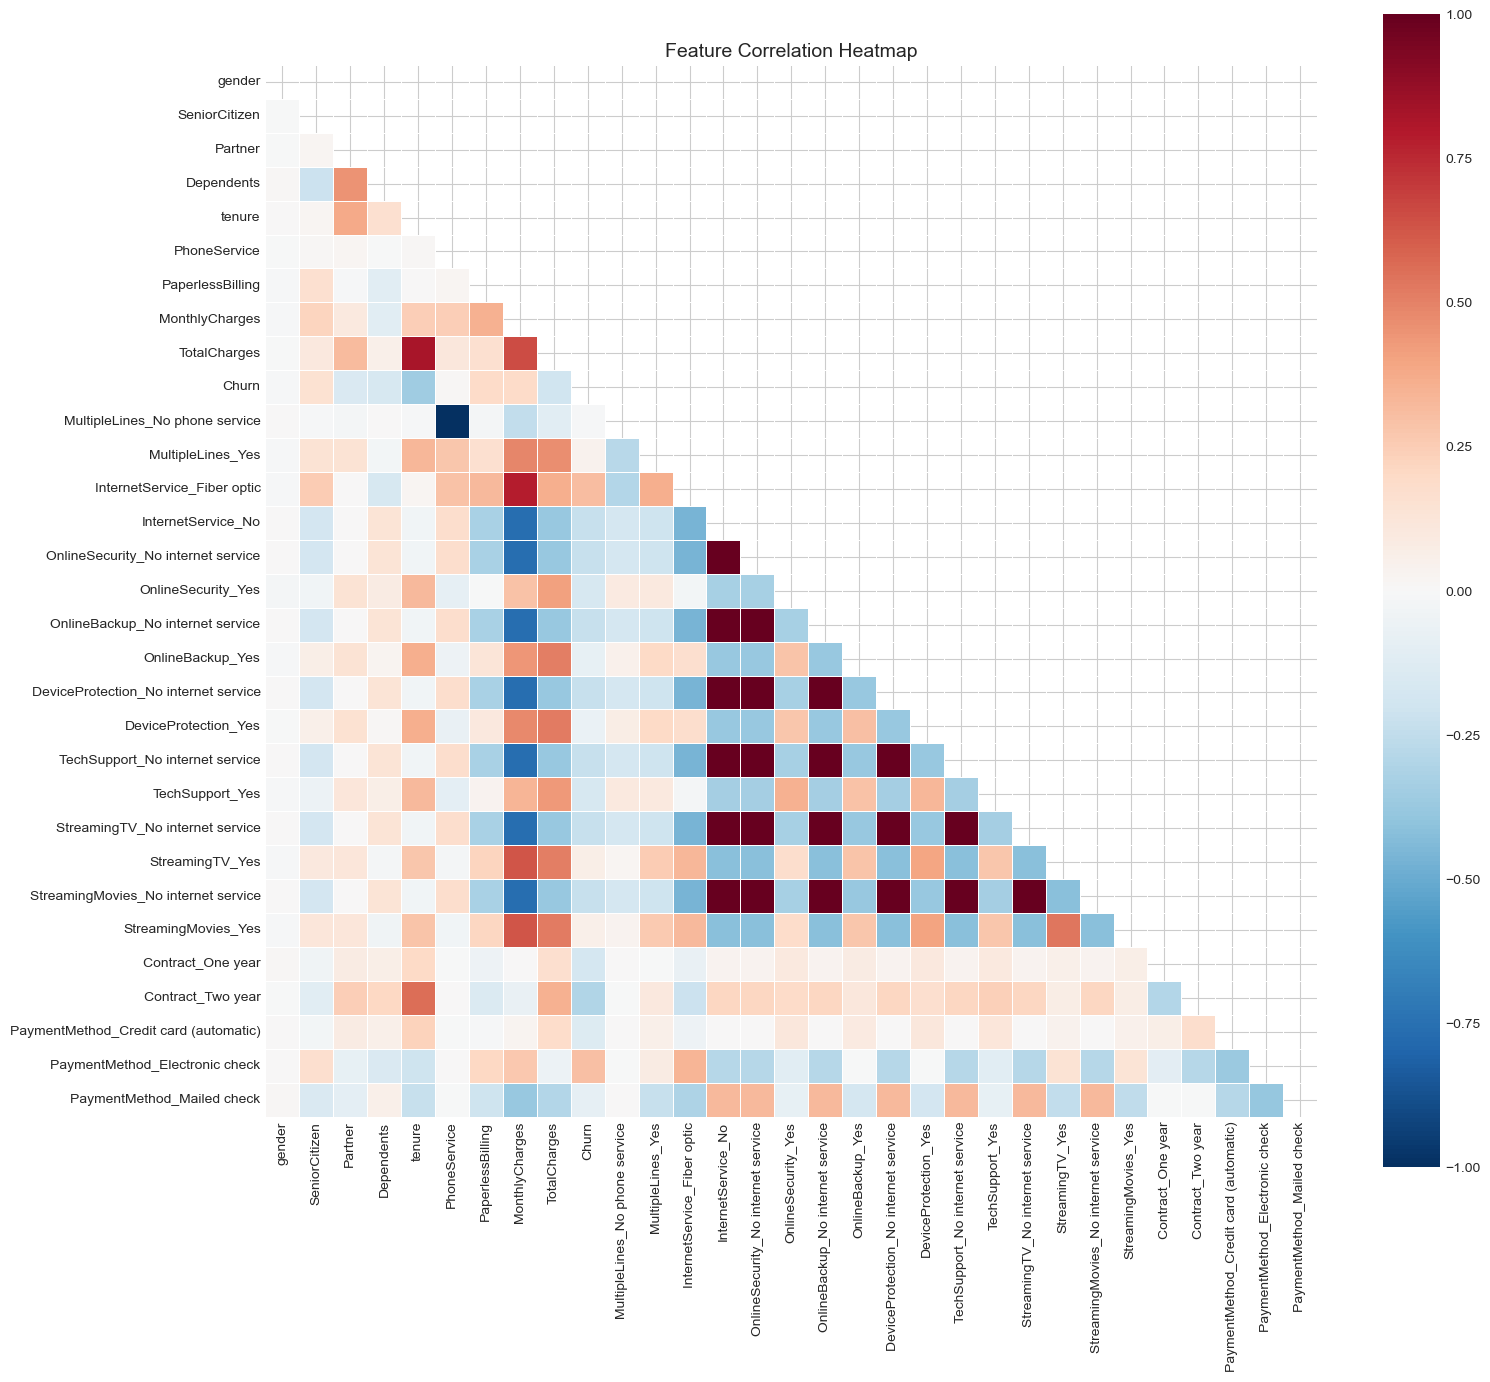

In [10]:

#Correlation Heatmap
df_processed = pd.read_csv('../data/telco_processed.csv')

plt.figure(figsize=(16, 14))
correlation_matrix = df_processed.corr()

churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print("Top correlations with Churn:")
print(churn_corr)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

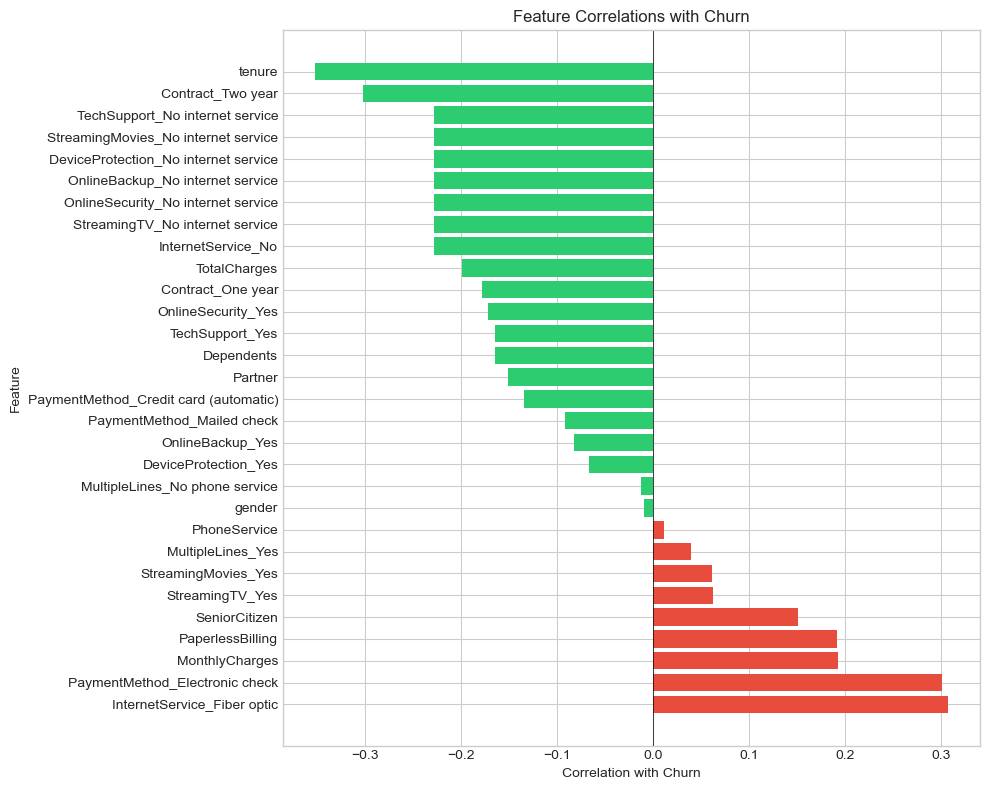

In [11]:
#Top Correlations with Churn
plt.figure(figsize=(10, 8))
churn_corr_filtered = churn_corr.drop('Churn')
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in churn_corr_filtered.values]
plt.barh(churn_corr_filtered.index, churn_corr_filtered.values, color=colors)
plt.xlabel('Correlation with Churn')
plt.ylabel('Feature')
plt.title('Feature Correlations with Churn')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

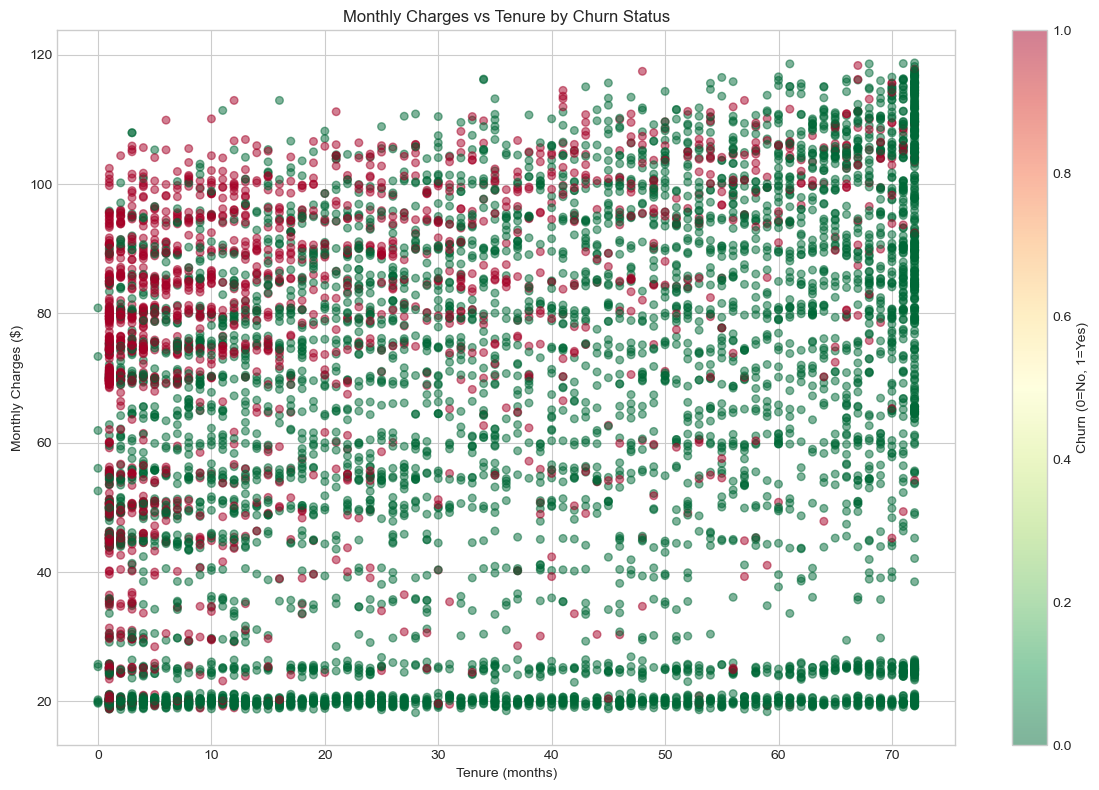

In [12]:
#  Monthly Charges vs Tenure Scatter
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['tenure'], df['MonthlyCharges'], 
                      c=df['Churn'].map({'Yes': 1, 'No': 0}), 
                      cmap='RdYlGn_r', alpha=0.5, s=30)
plt.colorbar(scatter, label='Churn (0=No, 1=Yes)')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.title('Monthly Charges vs Tenure by Churn Status')
plt.tight_layout()
plt.show()